<a href="https://colab.research.google.com/github/aliemadabdo/ML-Basics/blob/main/Lab7_task-mnist_3_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np 
import matplotlib.pyplot as plt 

from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split

In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
x_train_final = x_train.reshape(-1,784)
x_test_final = x_test.reshape(-1,784)

In [16]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [17]:
x_train_final = x_train_final/255
x_test_final = x_test_final/255

In [18]:
model = Sequential()
model.add(Dense(512, input_shape=(784,),activation='relu'))

#then shape of first layer 
model.add(Dense(256,activation='relu'))

model.add(Dense(10, activation='softmax')) # not hidden ()

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics='accuracy')# sgd : stocatic gradiant 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [19]:
result = model.fit(x_train_final,y_train,batch_size=32,epochs=10,validation_data=(x_test_final,y_test),verbose=1) 


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5587 - accuracy: 0.8576 - val_loss: 0.2937 - val_accuracy: 0.9149
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2713 - accuracy: 0.9223 - val_loss: 0.2263 - val_accuracy: 0.9353
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2202 - accuracy: 0.9377 - val_loss: 0.1971 - val_accuracy: 0.9448
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1863 - accuracy: 0.9475 - val_loss: 0.1692 - val_accuracy: 0.9523
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1616 - accuracy: 0.9542 - val_loss: 0.1517 - val_accuracy: 0.9560
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1422 - accuracy: 0.9595 - val_loss: 0.1405 - val_accuracy: 0.9604
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1268 - accuracy: 0.9642 - val_loss: 0.1264 - val_accuracy:

Text(0.5, 0, 'epoch')

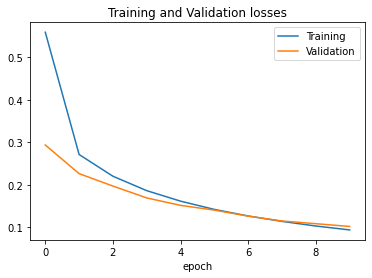

In [20]:
plt.plot(result.history['loss'])

plt.plot(result.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

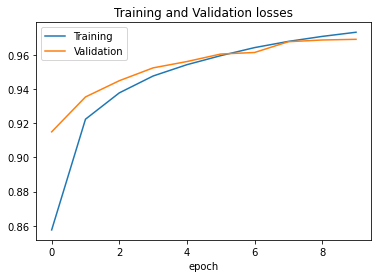

In [21]:
plt.plot(result.history['accuracy'])

plt.plot(result.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')

In [22]:
# task using cifar10